In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import citipy
from citipy import citipy
from config import api_key
import json
import os

output_data_file = "output/cities.csv"

In [2]:
#Set ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
#Create lists for latitudes/longitudes and cities
lat_lngs = []
cities = []

In [3]:
# Use .random to select random latitudes/longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Use zip to combine latitudes/longitudes and put in list
lat_lngs = zip(lats, lngs)

In [ ]:
# Using the list made, identify nearest city for latitudes/longitudes combinations
for lat_lng in lat_lngs:
    near_city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if near_city not in cities:
        cities.append(near_city)

In [4]:
#Set up lists to append data into
city_list = []
max_temp_list = []
humidity_list = []
cloud_list = []
wind_speed_list = []
country_code_list = []
date_list = []
lat_list = []
lng_list = []

In [24]:
index = 0
set_count = 1 
print("Begin")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
imperial = "imperial"

#Use f string to set up query url
query_url = f"{base_url}appid={api_key}&units={imperial}&q="

# For each city name in cities list, do below things...
for city in (cities):
    try:
        response_json = requests.get(query_url + city).json()
        city_list.append(response_json["name"])
        cloud_list.append(response_json["clouds"]["all"])
        country_code_list.append(response_json["sys"]["country"])
        date_list.append(response_json["dt"])
        humidity_list.append(response_json["main"]["humidity"])
        lat_list.append(response_json["coord"]["lat"])
        lng_list.append(response_json["coord"]["lon"])
        max_temp_list.append(response_json['main']['temp_max'])
        wind_speed_list.append(response_json["wind"]["speed"])

        if index > 49:
            index = 1
            set_count += 1 
        else:
            index += 1
        print(f"Processing Record #{index}, city name: {city}, set #{set_count}")
    except KeyError:
        print("Oops, that key doesn't exist.")

print("-----------------------------")
print("All Finished!")
print("-----------------------------")

Begin
Processing Record #1, city name: mao, set #1
Processing Record #2, city name: baracoa, set #1
Processing Record #3, city name: saskylakh, set #1
Processing Record #4, city name: thompson, set #1
Processing Record #5, city name: korla, set #1
Processing Record #6, city name: bambous virieux, set #1
Processing Record #7, city name: olinda, set #1
Processing Record #8, city name: antofagasta, set #1
Processing Record #9, city name: yellowknife, set #1
Processing Record #10, city name: ribeira grande, set #1
Processing Record #11, city name: rikitea, set #1
Processing Record #12, city name: yarkovo, set #1
Processing Record #13, city name: saldanha, set #1
Processing Record #14, city name: puerto ayora, set #1
Oops, that key doesn't exist.
Processing Record #15, city name: barrow, set #1
Processing Record #16, city name: port hawkesbury, set #1
Processing Record #17, city name: kalispell, set #1
Processing Record #18, city name: clyde river, set #1
Processing Record #19, city name: l

Processing Record #1, city name: harper, set #4
Processing Record #2, city name: galle, set #4
Processing Record #3, city name: independence, set #4
Processing Record #4, city name: maniitsoq, set #4
Processing Record #5, city name: lorengau, set #4
Processing Record #6, city name: sili, set #4
Processing Record #7, city name: kelamangalam, set #4
Processing Record #8, city name: marawi, set #4
Processing Record #9, city name: anloga, set #4
Processing Record #10, city name: husavik, set #4
Processing Record #11, city name: dikson, set #4
Processing Record #12, city name: victoria, set #4
Processing Record #13, city name: cayenne, set #4
Processing Record #14, city name: cidreira, set #4
Processing Record #15, city name: altamira, set #4
Processing Record #16, city name: mantua, set #4
Oops, that key doesn't exist.
Processing Record #17, city name: strezhevoy, set #4
Processing Record #18, city name: lucea, set #4
Processing Record #19, city name: parasia, set #4
Processing Record #20,

Processing Record #1, city name: chato, set #7
Processing Record #2, city name: meulaboh, set #7
Processing Record #3, city name: coquimbo, set #7
Processing Record #4, city name: liberal, set #7
Processing Record #5, city name: lasa, set #7
Oops, that key doesn't exist.
Processing Record #6, city name: cesvaine, set #7
Processing Record #7, city name: lodja, set #7
Processing Record #8, city name: crotone, set #7
Processing Record #9, city name: mossendjo, set #7
Oops, that key doesn't exist.
Processing Record #10, city name: metu, set #7
Processing Record #11, city name: susanville, set #7
Processing Record #12, city name: yaring, set #7
Processing Record #13, city name: sao jose da coroa grande, set #7
Processing Record #14, city name: caucaia, set #7
Processing Record #15, city name: vanimo, set #7
Processing Record #16, city name: hithadhoo, set #7
Processing Record #17, city name: tupik, set #7
Processing Record #18, city name: marsh harbour, set #7
Processing Record #19, city na

Processing Record #5, city name: dingle, set #10
Processing Record #6, city name: oksfjord, set #10
Processing Record #7, city name: camacha, set #10
Processing Record #8, city name: ixtapa, set #10
Processing Record #9, city name: irituia, set #10
Oops, that key doesn't exist.
Processing Record #10, city name: vila franca do campo, set #10
Processing Record #11, city name: dwarka, set #10
Processing Record #12, city name: mpika, set #10
Processing Record #13, city name: dali, set #10
Processing Record #14, city name: kutum, set #10
Processing Record #15, city name: saint-francois, set #10
Oops, that key doesn't exist.
Processing Record #16, city name: samarai, set #10
Oops, that key doesn't exist.
Processing Record #17, city name: aykino, set #10
Processing Record #18, city name: amapa, set #10
Processing Record #19, city name: alamogordo, set #10
Processing Record #20, city name: ordu, set #10
Processing Record #21, city name: alot, set #10
Processing Record #22, city name: hof, set 

In [25]:
print(f"The first response is {json.dumps(response, indent=2)}.")

The first response is {
  "coord": {
    "lon": 104.2494,
    "lat": 56.7032
  },
  "weather": [
    {
      "id": 803,
      "main": "Clouds",
      "description": "broken clouds",
      "icon": "04d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": -44.48,
    "feels_like": -52.6,
    "temp_min": -44.48,
    "temp_max": -44.48,
    "pressure": 1049,
    "humidity": 81,
    "sea_level": 1049,
    "grnd_level": 964
  },
  "visibility": 10000,
  "wind": {
    "speed": 1.77,
    "deg": 281
  },
  "clouds": {
    "all": 55
  },
  "dt": 1612056403,
  "sys": {
    "country": "RU",
    "sunrise": 1612054993,
    "sunset": 1612085369
  },
  "timezone": 28800,
  "id": 2022232,
  "name": "Khrebtovaya",
  "cod": 200
}.


In [26]:
print(len(city_list))
print(len(cloud_list))
print(len(country_code_list))
print(len(date_list))
print(len(humidity_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(date_list))
print(len(wind_speed_list))

772
772
772
772
772
772
772
772
772
772


In [59]:
# Create a pandas dataframe using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloud_list,
                "Country" : country_code_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [58]:
weather_df.to_csv("output/cities_final.csv", index = False)

In [60]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mahon,20,ES,1612055710,93,39.8885,4.2658,48.20,5.75
1,Baracoa,100,CU,1612055710,80,20.3467,-74.4958,71.98,13.60
2,Saskylakh,100,RU,1612055710,82,71.9167,114.0833,-33.81,11.70
3,Thompson,90,CA,1612055698,92,55.7435,-97.8558,14.00,2.89
4,Korla,0,CN,1612055711,85,41.7597,86.1469,18.37,4.43
...,...,...,...,...,...,...,...,...,...
767,Mugumu,50,TZ,1612058486,88,-1.8500,34.7000,58.06,4.74
768,Eureka,90,US,1612058487,87,40.8021,-124.1637,53.01,4.61
769,Olonets,100,RU,1612058487,98,60.9847,32.9698,20.17,4.92
770,Sahuaripa,0,MX,1612058487,39,29.0500,-109.2333,60.30,1.34


In [61]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,772.000000,7.720000e+02,772.000000,772.000000,772.000000,772.000000,772.000000
mean,54.506477,1.612058e+09,76.229275,20.804467,9.117846,46.026062,8.151088
std,40.275300,1.151847e+03,17.052997,34.318681,90.133020,35.108556,5.607334
min,0.000000,1.612055e+09,16.000000,-54.800000,-175.200000,-47.490000,0.630000
25%,7.750000,1.612056e+09,70.000000,-8.118100,-68.748075,19.400000,4.090000
50%,69.000000,1.612058e+09,80.000000,24.910650,13.501400,60.800000,6.860000
75%,95.000000,1.612058e+09,89.000000,50.041400,82.275350,74.815000,11.500000
max,100.000000,1.612058e+09,100.000000,78.218600,179.316700,100.400000,31.520000


The lower the latitude the more likely temperature is to drop


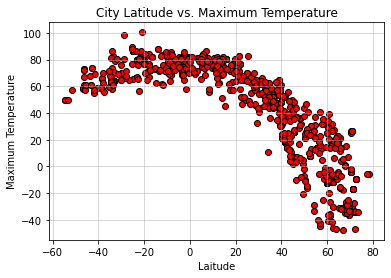

In [64]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title, label and grid
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Laitude")
plt.ylabel("Maximum Temperature")
plt.grid(linewidth=.5, alpha = 1)

# Save as .pngs
plt.savefig("images/City Latitude vs Maximum Temperature.png")
print("The lower the latitude the more likely temperature is to drop")

The higher latitude the higher the likelyhood of there being high humidity


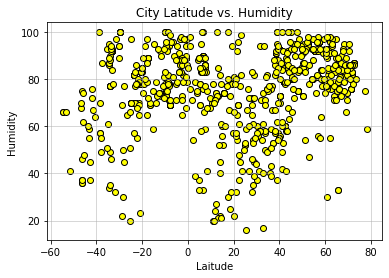

In [65]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "yellow", edgecolor = "black")

# Set title, label and grid
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linewidth=.5, alpha = 1)

# Save as .pngs
plt.savefig("images/City Latitude vs. Humidity.png")
print("The higher latitude the higher the likelyhood of there being high humidity")

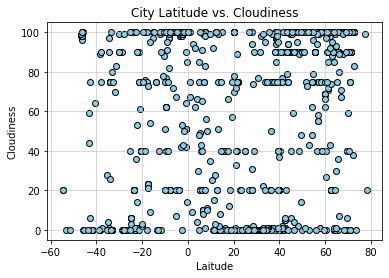

In [42]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "skyblue", edgecolor = "black")

# Set title, label and grid
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")
plt.grid(linewidth=.5, alpha = 1)

# Save as .pngs
plt.savefig("images/City Latitude vs. Cloudiness.png")
print("There doesn't appear to be much of a correlation betweent the two")

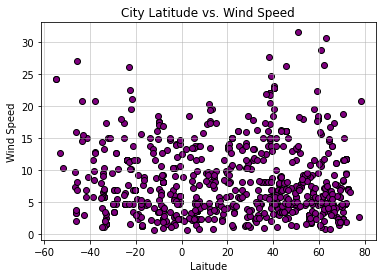

In [43]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "purple", edgecolor = "black")

# Set title, label and grid
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")
plt.grid(linewidth=.5, alpha = 1)

# Save as .pngs
plt.savefig("images/City Latitude vs. Wind Speed.png")
print("There are slightly higher wind speeds at higher latitudes")

In [44]:
from datetime import datetime
ts = int("1611860897")
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))

2021-01-28


In [45]:
weather_df['date'] = pd.to_datetime(weather_df['Date'],unit='s')

In [46]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,date
0,Mahon,20,ES,1612055710,93,39.8885,4.2658,48.20,5.75,2021-01-31 01:15:10
1,Baracoa,100,CU,1612055710,80,20.3467,-74.4958,71.98,13.60,2021-01-31 01:15:10
2,Saskylakh,100,RU,1612055710,82,71.9167,114.0833,-33.81,11.70,2021-01-31 01:15:10
3,Thompson,90,CA,1612055698,92,55.7435,-97.8558,14.00,2.89,2021-01-31 01:14:58
4,Korla,0,CN,1612055711,85,41.7597,86.1469,18.37,4.43,2021-01-31 01:15:11
...,...,...,...,...,...,...,...,...,...,...
767,Mugumu,50,TZ,1612058486,88,-1.8500,34.7000,58.06,4.74,2021-01-31 02:01:26
768,Eureka,90,US,1612058487,87,40.8021,-124.1637,53.01,4.61,2021-01-31 02:01:27
769,Olonets,100,RU,1612058487,98,60.9847,32.9698,20.17,4.92,2021-01-31 02:01:27
770,Sahuaripa,0,MX,1612058487,39,29.0500,-109.2333,60.30,1.34,2021-01-31 02:01:27


In [47]:
#Sepperate northern and southern by latitude
Northern_Hem = weather_df[weather_df.Lat >= 0]
Southern_Hem = weather_df[weather_df.Lat <= 0]

In [48]:
from sklearn.linear_model import LinearRegression

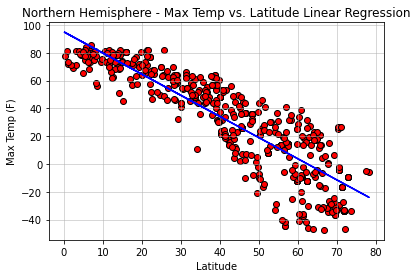

<Figure size 432x288 with 0 Axes>

In [77]:
#Create variables for northern and southern , temperature,humidity,coudiness and wind speed.
Lat_N = Northern_Hem.iloc[:, 5].values.reshape(-1, 1)  
Lat_S = Southern_Hem.iloc[:, 5].values.reshape(-1, 1)  

Temp_N = Northern_Hem.iloc[:, 7].values.reshape(-1, 1) 
Temp_S = Southern_Hem.iloc[:, 7].values.reshape(-1, 1) 

Humidity_N = Northern_Hem.iloc[:, 4].values.reshape(-1, 1) 
Humidity_S = Southern_Hem.iloc[:, 4].values.reshape(-1, 1)  

Cloudiness_N = Northern_Hem.iloc[:, 1].values.reshape(-1, 1)  
Cloudiness_S = Southern_Hem.iloc[:, 1].values.reshape(-1, 1) 

Wind_Speed_N = Northern_Hem.iloc[:, 8].values.reshape(-1, 1)  
Wind_Speed_S = Southern_Hem.iloc[:, 8].values.reshape(-1, 1)  

#Create predictor line
linear_regressor = LinearRegression() 
linear_regressor.fit(Lat_N, Temp_N)  
Temp_N_Predict = linear_regressor.predict(Lat_N)  


#Create plot and set labels, title and grid
plt.scatter(Lat_N, Temp_N, facecolor = "red", edgecolor = "black")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.plot(Lat_N, Temp_N_Predict, color='blue')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

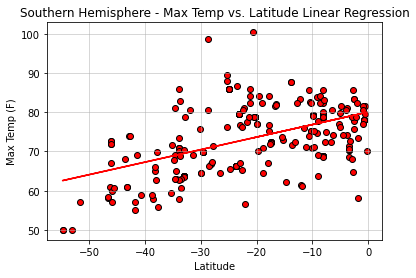

<Figure size 432x288 with 0 Axes>

In [78]:
#Create predictor line
linear_regressor = LinearRegression() 
linear_regressor.fit(Lat_S, Temp_S)  
Temp_S_Predict = linear_regressor.predict(Lat_S) 


#Create plot and set labels, title and grid
plt.scatter(Lat_S, Temp_S, facecolor = "red", edgecolor = "black")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.plot(Lat_S, Temp_S_Predict, color='red')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

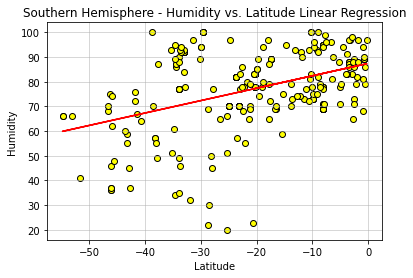

<Figure size 432x288 with 0 Axes>

In [79]:
#Create predictor line
linear_regressor = LinearRegression() 
linear_regressor.fit(Lat_S, Humidity_S)
Humidity_S_Predict = linear_regressor.predict(Lat_S) 


#Create plot and set labels, title and grid
plt.scatter(Lat_S, Humidity_S, facecolor = "yellow", edgecolor = "black")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(Lat_S, Humidity_S_Predict, color='red')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

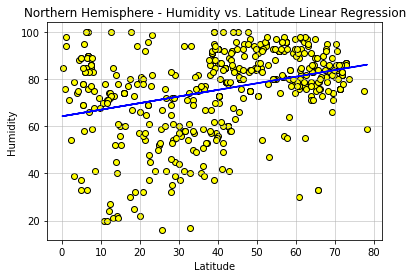

<Figure size 432x288 with 0 Axes>

In [80]:
#Create predictor line
linear_regressor = LinearRegression() 
linear_regressor.fit(Lat_N, Humidity_N)  
Humidity_N_Predict = linear_regressor.predict(Lat_N)  


#Create plot and set labels, title and grid
plt.scatter(Lat_N, Humidity_N, facecolor = "yellow", edgecolor = "black")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(Lat_N, Humidity_N_Predict, color='blue')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

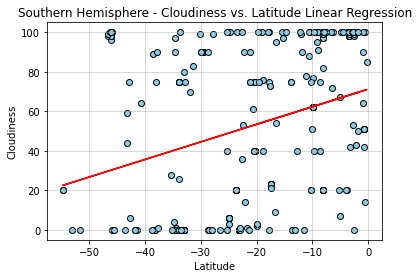

<Figure size 432x288 with 0 Axes>

In [81]:
#Create predictor line
linear_regressor = LinearRegression()  
linear_regressor.fit(Lat_S, Cloudiness_S) 
Cloudiness_S_Predict = linear_regressor.predict(Lat_S) 



#Create plot and set labels, title and grid
plt.scatter(Lat_S, Cloudiness_S, facecolor = "skyblue", edgecolor = "black")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(Lat_S, Cloudiness_S_Predict, color='red')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

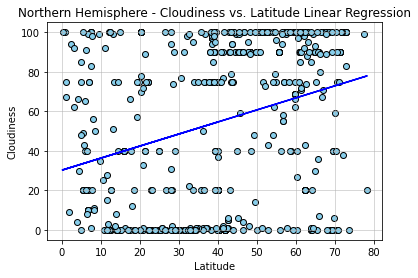

<Figure size 432x288 with 0 Axes>

In [82]:
#Create predictor line
linear_regressor = LinearRegression()  
linear_regressor.fit(Lat_N, Cloudiness_N)  
Cloudiness_N_Predict = linear_regressor.predict(Lat_N)  

#Create plot and set labels, title and grid
plt.scatter(Lat_N, Cloudiness_N, facecolor = "skyblue", edgecolor = "black")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(Lat_N, Cloudiness_N_Predict, color='blue')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

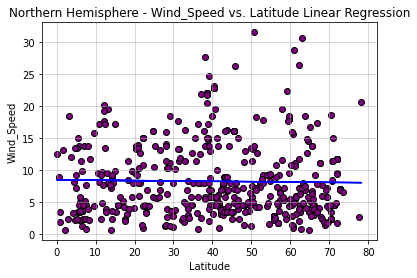

<Figure size 432x288 with 0 Axes>

In [83]:
#Create predictor line
linear_regressor = LinearRegression()  
linear_regressor.fit(Lat_N, Wind_Speed_N)  
Wind_Speed_N_Predict = linear_regressor.predict(Lat_N)  

#Create plot and set labels, title and grid
plt.scatter(Lat_N, Wind_Speed_N, facecolor = "purple", edgecolor = "black")
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.plot(Lat_N, Wind_Speed_N_Predict, color='blue')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression.png")

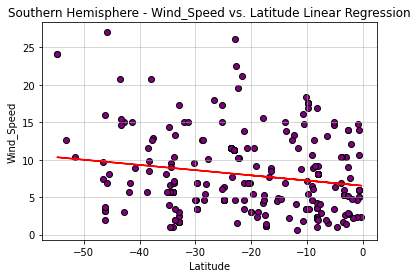

<Figure size 432x288 with 0 Axes>

In [84]:
#Create predictor line
linear_regressor = LinearRegression()  
linear_regressor.fit(Lat_S, Wind_Speed_S)  
Wind_Speed_S_Predict = linear_regressor.predict(Lat_S)  

#Create plot and set labels, title and grid
plt.scatter(Lat_S, Wind_Speed_S, facecolor = "purple", edgecolor = "black")
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.plot(Lat_S, Wind_Speed_S_Predict, color='red')
plt.grid(linewidth=.5, alpha = 1)
plt.show()

plt.savefig("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression.png")